In [1]:
#Load CIFAR-10 Database
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


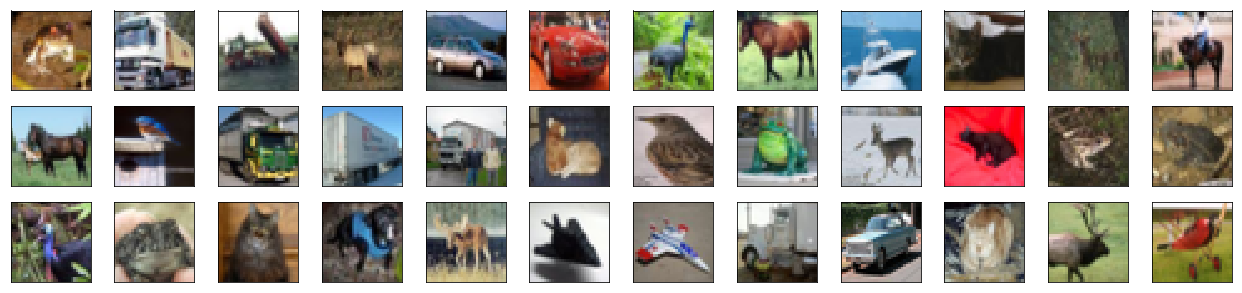

In [2]:
#Visualize the First 36 Training Images
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(22,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [3]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


In [4]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))

In [5]:
print(num_classes)

10


In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)

In [8]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
y_test = keras.utils.to_categorical(y_test, num_classes)


In [10]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
y_train.shape

(50000, 10)

In [12]:
# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [13]:
# print shape of training set
x_train.shape

(45000, 32, 32, 3)

In [14]:
# print shape of validating set
x_valid.shape

(5000, 32, 32, 3)

In [15]:
# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

45000 train samples
10000 test samples
5000 validation samples


# Define the Model Architecture

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxP

# Compile the Model

In [17]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

# Train the Model

In [18]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 51s - loss: 1.5955 - acc: 0.4226 - val_loss: 1.2874 - val_acc: 0.5288

Epoch 00001: val_loss improved from inf to 1.28741, saving model to model.weights.best.hdf5
Epoch 2/100
 - 52s - loss: 1.2633 - acc: 0.5490 - val_loss: 1.3086 - val_acc: 0.5552

Epoch 00002: val_loss did not improve from 1.28741
Epoch 3/100
 - 51s - loss: 1.1398 - acc: 0.5977 - val_loss: 1.0041 - val_acc: 0.6438

Epoch 00003: val_loss improved from 1.28741 to 1.00414, saving model to model.weights.best.hdf5
Epoch 4/100
 - 48s - loss: 1.0703 - acc: 0.6216 - val_loss: 1.0353 - val_acc: 0.6374

Epoch 00004: val_loss did not improve from 1.00414
Epoch 5/100
 - 44s - loss: 1.0304 - acc: 0.6385 - val_loss: 0.9547 - val_acc: 0.6712

Epoch 00005: val_loss improved from 1.00414 to 0.95471, saving model to model.weights.best.hdf5
Epoch 6/100
 - 43s - loss: 1.0087 - acc: 0.6491 - val_loss: 1.0984 - val_acc: 0.6304

E


Epoch 00056: val_loss did not improve from 0.90559
Epoch 57/100
 - 53s - loss: 1.6876 - acc: 0.4201 - val_loss: 1.4399 - val_acc: 0.4928

Epoch 00057: val_loss did not improve from 0.90559
Epoch 58/100
 - 53s - loss: 1.7052 - acc: 0.4135 - val_loss: 1.7269 - val_acc: 0.4110

Epoch 00058: val_loss did not improve from 0.90559
Epoch 59/100
 - 52s - loss: 1.6993 - acc: 0.4153 - val_loss: 1.5442 - val_acc: 0.4556

Epoch 00059: val_loss did not improve from 0.90559
Epoch 60/100
 - 52s - loss: 1.7029 - acc: 0.4117 - val_loss: 1.7754 - val_acc: 0.3790

Epoch 00060: val_loss did not improve from 0.90559
Epoch 61/100
 - 53s - loss: 1.7141 - acc: 0.4101 - val_loss: 1.5908 - val_acc: 0.4466

Epoch 00061: val_loss did not improve from 0.90559
Epoch 62/100
 - 53s - loss: 1.7227 - acc: 0.4083 - val_loss: 1.6501 - val_acc: 0.4242

Epoch 00062: val_loss did not improve from 0.90559
Epoch 63/100
 - 53s - loss: 1.7175 - acc: 0.4020 - val_loss: 1.6193 - val_acc: 0.4198

Epoch 00063: val_loss did not imp

# Load the Model with the Best Validation Accuracy

In [19]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

# Calculate Classification Accuracy on Test Set

In [20]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6881


# Visualize Some Predictions

In [21]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

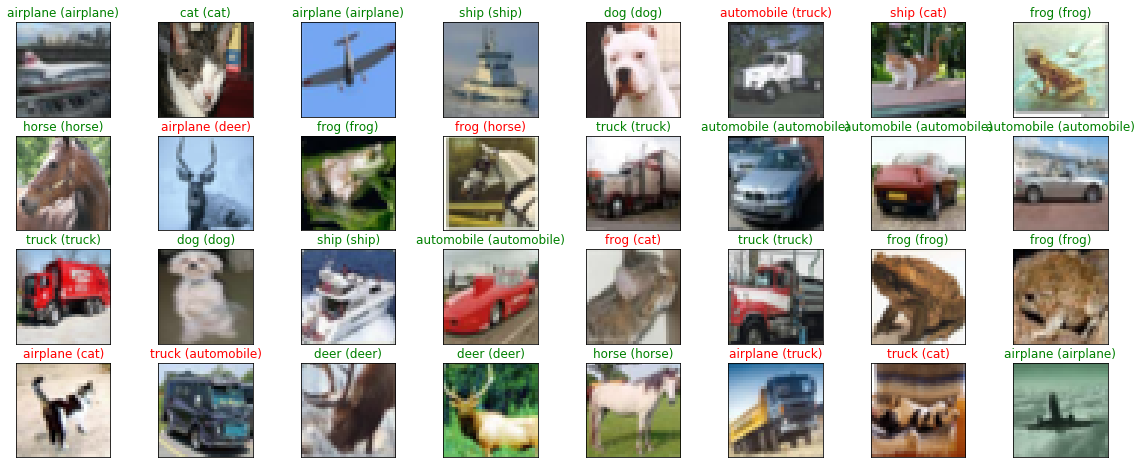

In [22]:

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))